<a href="https://colab.research.google.com/github/projjal1/Neural_Networks_Projects/blob/master/Dogs_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we use Kaggle dataset on Cats and Dogs to create Classifier based on Labels on Cats and Dogs.

In [1]:
%pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 32kB/s 


In [3]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Dataset url 
ds_url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

#Get file 
file_data=tf.keras.utils.get_file('cats_and_dogs.zip.zip',origin=ds_url,extract=True)

68608000/68606236 [==============================] - 2s 0us/step


In [5]:
#Now get the file directory structure
import os 

path=os.path.join(os.path.dirname(file_data),'cats_and_dogs_filtered')

In [6]:
path

'/root/.keras/datasets/cats_and_dogs_filtered'

Following Directory Structure will form 


cats_and_dogs_filtered

  |__ train]

    |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]

  |__ validation
  
    |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]

In [7]:
#Get the training path 
train_path=os.path.join(path,'train')
#Get the testing path
test_path=os.path.join(path,'validation')

In [10]:
train_cats_dir = os.path.join(train_path, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_path, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(test_path, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(test_path, 'dogs')  # directory with our validation dog pictures

In [11]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [12]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


Now we will be building up the architecture for classification problem

In [13]:
#Hyperparameters

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

Read images from the disk.
Decode contents of these images and convert it into proper grid format as per their RGB content.
Convert them into floating point tensors.
Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
Fortunately, all these tasks can be done with the ImageDataGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

After defining the generators for training and validation images, the flow_from_directory method load images from the disk, applies rescaling, and resizes the images into the required dimensions.

In [17]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_path,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


# Visualization
Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with matplotlib.

In [19]:
sample_training_images, _ = next(train_data_gen)

In [20]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

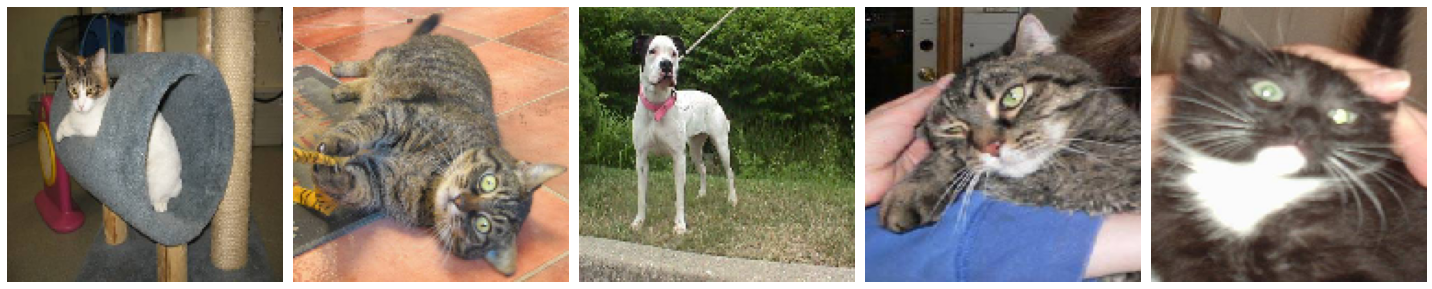

In [21]:
plotImages(sample_training_images[:5])

Now comes the fun part of creating the Neural Network Model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Here we are using adam classifier and binary_crossentropy, as its a classification problem

In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [28]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 9s 606ms/step - loss: 0.9842 - accuracy: 0.4957 - val_loss: 0.6899 - val_accuracy: 0.4989
Epoch 2/15
15/15 [==============================] - 9s 589ms/step - loss: 0.6777 - accuracy: 0.5588 - val_loss: 0.6604 - val_accuracy: 0.5904
Epoch 3/15
15/15 [==============================] - 9s 593ms/step - loss: 0.6199 - accuracy: 0.6768 - val_loss: 0.6197 - val_accuracy: 0.6629
Epoch 4/15
15/15 [==============================] - 9s 589ms/step - loss: 0.5644 - accuracy: 0.7228 - val_loss: 0.5868 - val_accuracy: 0.6953
Epoch 5/15
15/15 [==============================] - 9s 592ms/step - loss: 0.5006 - accuracy: 0.7719 - val_loss: 0.6635 - val_accuracy: 0.6417
Epoch 6/15
15/15 [==============================] - 9s 588ms/step - loss: 0.4768 - accuracy: 0.7708 - val_loss: 0.6419 - val_accuracy: 0.6741
Epoch 7/15
15/15 [==============================] - 9s 597ms/step - loss

In [30]:
type(history)

tensorflow.python.keras.callbacks.History

In [31]:
d_params=history.history

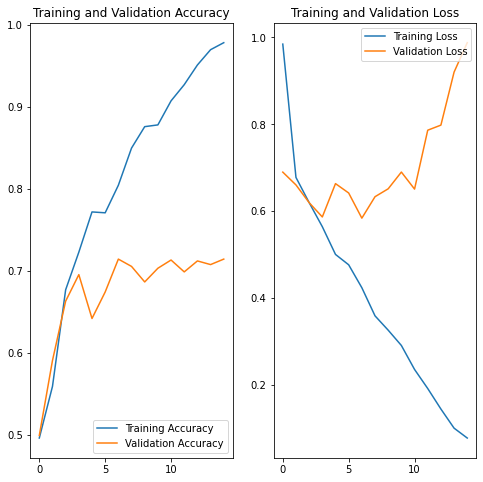

In [34]:
acc=d_params["accuracy"]
val_acc=d_params["val_accuracy"]

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Above we clearly notice the relationships to establish that overfitting is happening

# Now we will apply Data Augmentation

Pass horizontal_flip as an argument to the ImageDataGenerator class and set it to True to apply this augmentation.

In [35]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [37]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_path,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times.

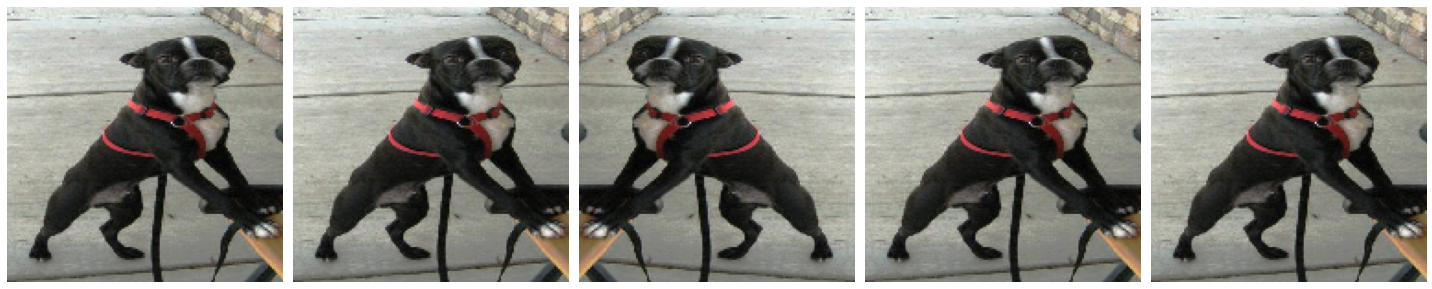

In [38]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

Let's take a look at a different augmentation called rotation and apply 45 degrees of rotation randomly to the training examples.

In [39]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

Found 2000 images belonging to 2 classes.


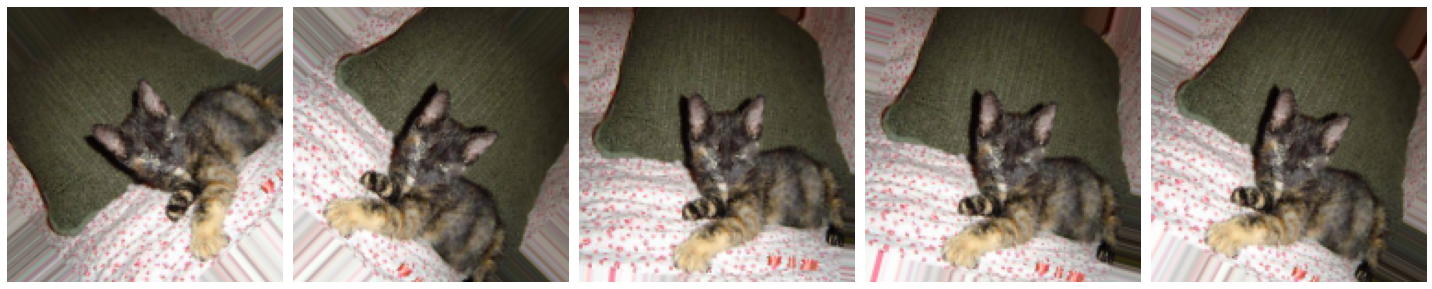

In [40]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_path,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Apply a zoom augmentation to the dataset to zoom images up to 50% randomly.

Found 2000 images belonging to 2 classes.


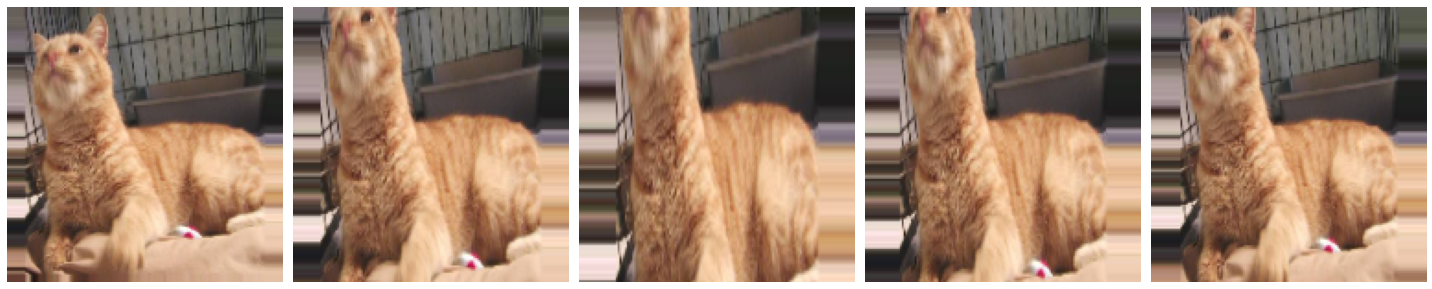

In [42]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_path,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Put it all together
Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images.

In [43]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [45]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_path,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


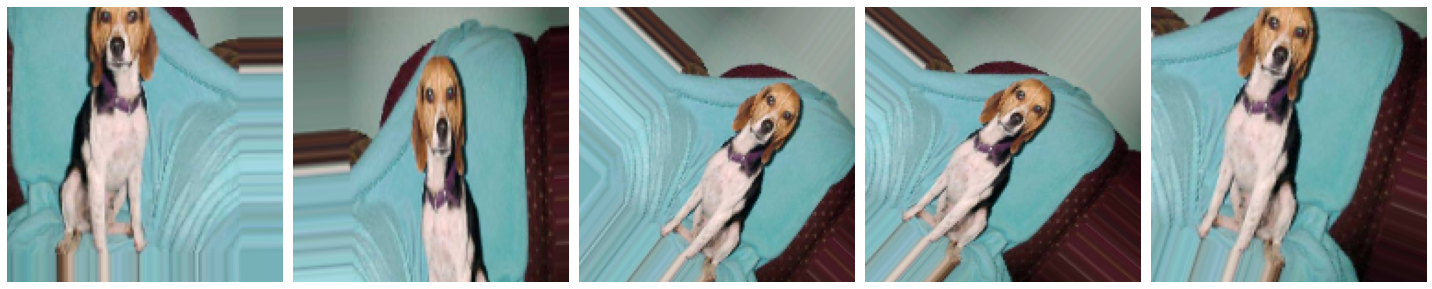

In [46]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#Create validation data generator
Generally, only apply data augmentation to the training examples. In this case, only rescale the validation images and convert them into batches using ImageDataGenerator.

In [47]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [49]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_path,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


#Dropout
Another technique to reduce overfitting is to introduce dropout to the network. It is a form of regularization that forces the weights in the network to take only small values, which makes the distribution of weight values more regular and the network can reduce overfitting on small training examples. Dropout is one of the regularization technique used in this tutorial

When you apply dropout to a layer it randomly drops out (set to zero) number of output units from the applied layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

When appling 0.1 dropout to a certain layer, it randomly kills 10% of the output units in each training epoch.

#Create a network architecture with this new dropout feature and apply it to different convolutions and fully-connected layers.

Creating a new network with Dropouts
Here, you apply dropout to first and last max pool layers and to a fully connected layer that has 512 output units. 30% of the first and last max pool layer, and 10% of fully connected layer output units, are randomly set to zero during each training epoch.

In [51]:
model_new = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [52]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [53]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 18s 1s/step - loss: 2.0062 - accuracy: 0.4953 - val_loss: 0.6954 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.6931 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 4/15
15/15 [==============================] - 18s 1s/step - loss: 0.6943 - accuracy: 0.5208 - val_loss: 0.6932 - val_accuracy: 0.4955
Epoch 5/15
15/15 [==============================] - 18s 1s/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.4978
Epoch 6/15
15/15 [==============================] - 18s 1s/step - loss: 0.6925 - accuracy: 0.5021 - val_loss: 0.6910 - val_accuracy: 0.5022
Epoch 7/15
15/15 [==============================] - 18s 1s/step - loss: 0.6914 - accuracy: 0.5224 - val_loss: 0.6873 - val_accuracy: 0.5324
Epoch 8/15
15/15 [==

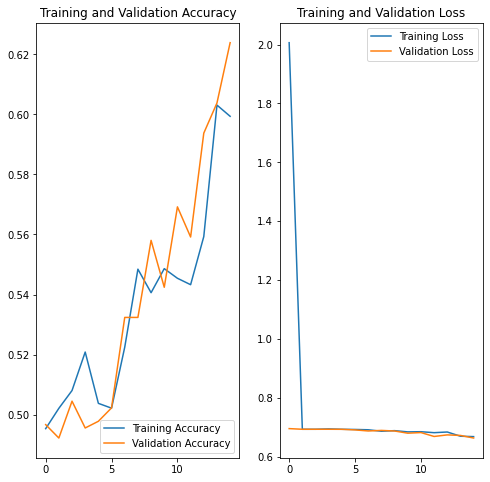

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()